In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
# from sklearn.metrics import confusion_matrix
import seaborn as sb

In [4]:
mnist= tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images/255 

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images/255

# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.imshow(train_images[i],cmap='gray')
# plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


 
 

---


  **CNN Model**







In [6]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(10))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)              

In [7]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=100

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/10
600/600 [==============================] - 14s 22ms/step - loss: 0.2182 - accuracy: 0.9309
Epoch 2/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0577 - accuracy: 0.9820
Epoch 3/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0412 - accuracy: 0.9872
Epoch 4/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0310 - accuracy: 0.9905
Epoch 5/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 6/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0202 - accuracy: 0.9938
Epoch 7/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0184 - accuracy: 0.9937
Epoch 8/10
600/600 [==============================] - 13s 22ms/step - loss: 0.0136 - accuracy: 0.9958
Epoch 9/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0121 - accuracy: 0.9960
Epoch 10/10
600/600 [==============================] - 13s 22ms/step - loss: 0.012

In [8]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

100/100 [==============================] - 1s 6ms/step - loss: 0.0388 - accuracy: 0.9895
Accuracy :  0.9894999861717224


#### Adding SoftMax Layer

2023-09-07 12:33:09.849953: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1730560000 exceeds 10% of free system memory.
2023-09-07 12:33:10.062562: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1730560000 exceeds 10% of free system memory.
2023-09-07 12:33:10.313693: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1730560000 exceeds 10% of free system memory.
2023-09-07 12:33:10.621826: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 432640000 exceeds 10% of free system memory.


Prediction :  3


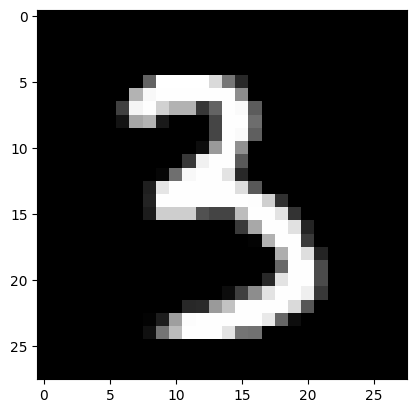

In [9]:

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(100)

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",label0)


In [10]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")

105/313 [=========>....................] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


NameError: name 'confusion_matrix' is not defined